In [57]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


PHÂN TÍCH ĐA BIẾN

In [58]:
train_df = pd.read_csv('train.csv')

In [59]:
new_data_test = train_df.head(500)
new_data_test

,ID,STATUS,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,...,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,dep_value,Is high risk
0,5037048,NaN,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,...,-16271,-3111,1,0,0,0,Core staff,2.0,0.0,0.0
1,5044630,NaN,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,...,-10130,-1651,1,0,0,0,Accountants,2.0,0.0,0.0
2,5079079,NaN,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,...,-12821,-5657,1,0,0,0,Laborers,NaN,NaN,NaN
3,5112872,NaN,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,...,-20929,-2046,1,0,0,1,Managers,1.0,0.0,0.0
4,5105858,NaN,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,...,-16207,-515,1,0,1,0,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5145952,NaN,F,N,Y,1,337500.0,Commercial associate,Higher education,Single / not married,...,-14408,-431,1,0,0,0,Accountants,2.0,0.0,0.0
496,5115473,NaN,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,...,-21008,365243,1,0,0,0,NaN,2.0,0.0,0.0
497,5096752,NaN,M,Y,N,0,328500.0,Working,Higher education,Married,...,-14897,-2654,1,1,1,0,NaN,2.0,0.0,0.0
498,5126451,NaN,M,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13937,-4853,1,1,1,0,Managers,2.0,0.0,0.0


Tuổi và sở hữu xe hơi

In [60]:
def get_sum_people_by_item(df, item, age):
    sum = 0
    for i in range(len(df)):
        if df.loc[i, "Age"] // -365.25 == age and df.loc[i, item] == 'Y':
            sum += 1
    return sum
# get_sum_people_by_item(new_data_test, "Has a car", 44)

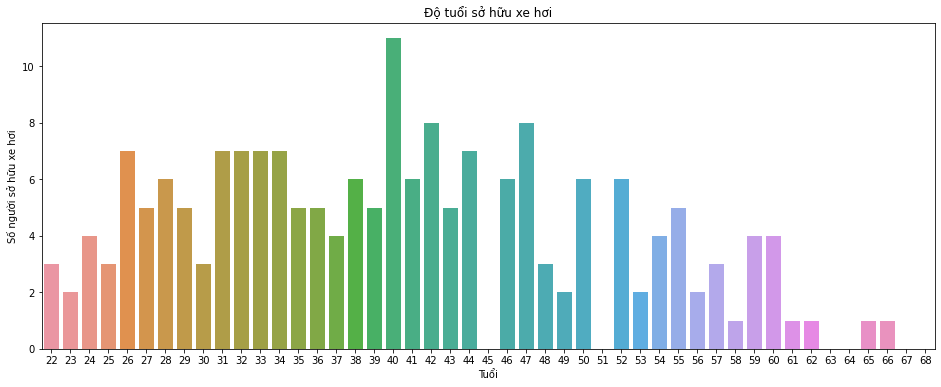

In [61]:
list_age = [int(age // -365.25) for age in new_data_test.Age]
sum = []
for i in list_age:
    sum.append(get_sum_people_by_item(new_data_test, "Has a car", i))

# plot
plt.figure(figsize=(16,6))
plt.title("Độ tuổi sở hữu xe hơi")
plt.xlabel("Tuổi")
plt.ylabel("Số người sở hữu xe hơi")
sns.barplot(x=list_age, y=sum)
plt.show()

Tuổi và sở hữu tài sản

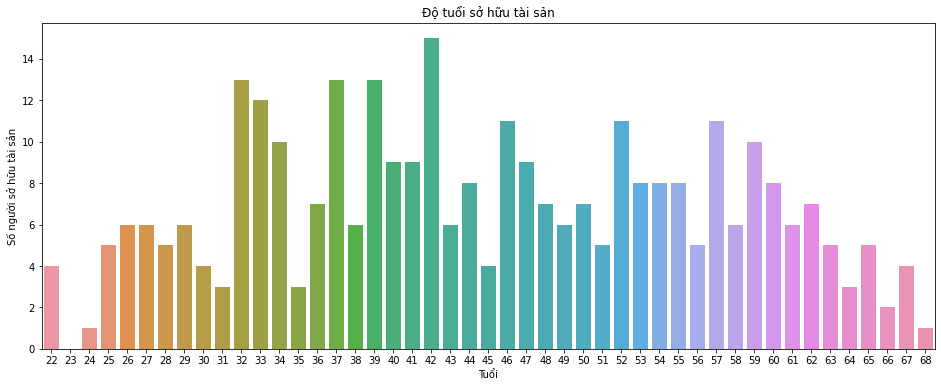

In [62]:
list_age = [int(age // -365.25) for age in new_data_test.Age]
sum = []
for i in list_age:
    sum.append(get_sum_people_by_item(new_data_test, "Has a property", i))

# plot
plt.figure(figsize=(16,6))
plt.title("Độ tuổi sở hữu tài sản")
plt.xlabel("Tuổi")
plt.ylabel("Số người sở hữu tài sản")
sns.barplot(x=list_age, y=sum)
plt.show()

Tuổi và thu nhập

In [63]:
def get_average_income_by_age(df, age):
    sum = 0
    count = 0
    for i in range(len(df)):
        if df.loc[i, "Age"] // -365.25 == age:
            sum += df.loc[i, "Income"]
            # print(df.loc[i, "Income"])
            count += 1
    return sum / count
# get_average_income_by_age(new_data_test, 22)

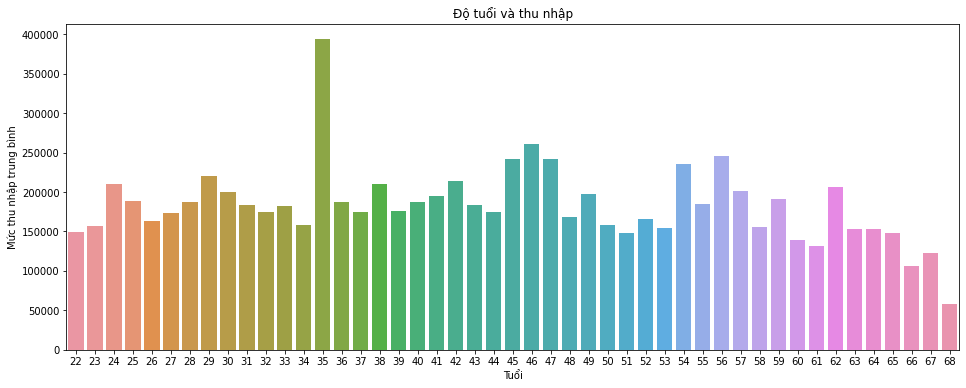

In [64]:
list_age = [int(age // -365.25) for age in new_data_test.Age]
sum = []
for i in list_age:
    sum.append(get_average_income_by_age(new_data_test, i))

# plot
plt.figure(figsize=(16,6))
plt.title("Độ tuổi và thu nhập")
plt.xlabel("Tuổi")
plt.ylabel("Mức thu nhập trung bình")
sns.barplot(x=list_age, y=sum)
plt.show()

Ngành nghề và mức thu nhập

In [67]:
def get_average_income_by_job(df, job):
    sum = 0
    count = 0
    for i in range(len(df)):
        if df.loc[i, "Job title"] == job:
            sum += df.loc[i, "Income"]
            # print(df.loc[i, "Income"])
            count += 1
    return sum / count

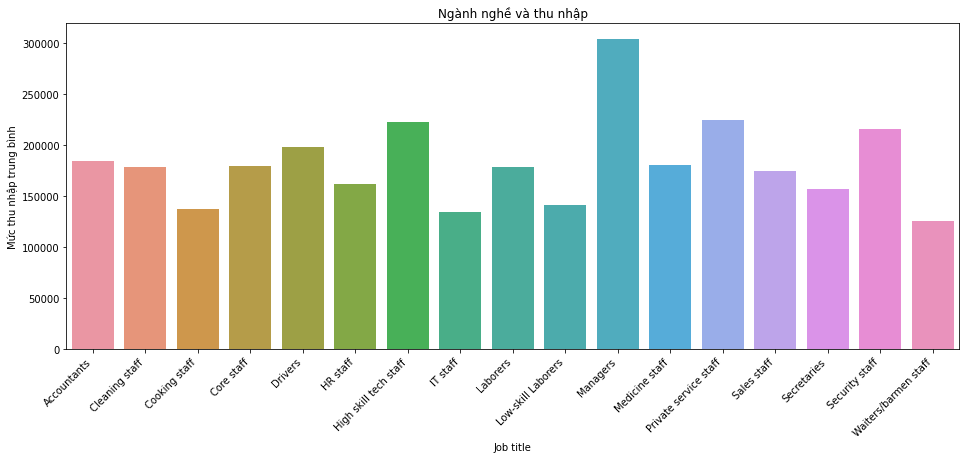

In [68]:
job_title = new_data_test.groupby(["Job title"])["Job title"].size()
sum = []
for i in job_title.index:
    sum.append(get_average_income_by_job(new_data_test, i))

# plot
plt.figure(figsize=(16,6))
plt.title("Ngành nghề và thu nhập")
plt.xlabel("Ngành nghề")
plt.ylabel("Mức thu nhập trung bình")
chart = sns.barplot(x=job_title.index, y=sum)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()